# Ejecicio - Series temporales aleatorias y caóticas

El objetivo de este ejercicio es analizar dos series de datos provistas (*data1.txt* y *data2.txt*) para evaluar si se pueden distinguir datos de tipo aleatorio de los generados mediante transformaciones deterministas.

In [1]:
# import required libraries
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
# Update the matplotlib configuration parameters:
matplotlib.rcParams.update({'font.size': 16, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
# import data to study
data1 = np.genfromtxt("../data/data1.txt")
data2 = np.genfromtxt("../data/data2.txt")

## Comparación

En primer lugar, se van a comparar las dos series $x(n)$ en función de $n$, para ver si se pueden apreciar diferencias cualitativas en su evolución temporal temporal. Dado que se dispone de 10169 puntos para cada serie, las dos señales no se pueden comparar de forma grafica para todo el rango de $n$ sino que se va a realizar la comparacion en rangos temporales más cortos (i.e. $1\leq n \leq 500$):

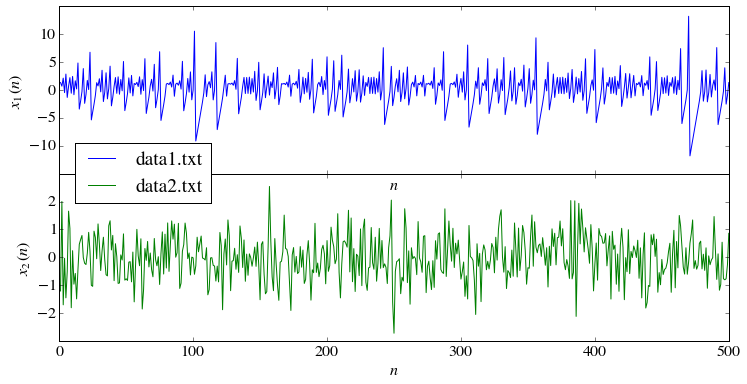

In [2]:
# n ranges (from 1 to 10169)
n_min = 1
n_max = 500
# plot figure with same axis
f, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(12, 6), dpi = 300)
f.subplots_adjust(hspace=0) # no space between plots
# hide labels in joint axis
f.axes[0].get_yticklabels()[0].set_visible(False)
f.axes[1].get_yticklabels()[-0].set_visible(False)
# plot data and set axis
n_values = np.linspace(n_min, n_max , n_max-n_min+1)
line1, = ax1.plot(n_values, data1[n_min-1:n_max], "b")
ax1.set_xlabel(u"$n$")
ax1.set_ylabel(u"$x_1(n)$")
line2, = ax2.plot(n_values, data2[n_min-1:n_max], "g")
ax2.set_xlabel(u"$n$")
ax2.set_ylabel(u"$x_2(n)$")
# legend (backgroud white)
leg = f.legend((line1, line2), ('data1.txt', 'data2.txt'), loc=(0.1,0.47), frameon = True)
frame = leg.get_frame()
frame.set_facecolor('white')

Se observa una evolución temporal muy diferente en cada serie de datos. Para la primeria serie de datos, se aprecia qualitativamente cierta estructura periodica. Por ejemplo, para ciertos $n$ (e.g. en $n \approx 250$, se produce una la repetición aproximada de un patron temporal en tres ocasiones, lo que es altamente improbable en un proceso aleatorio. Para la segunda serie de datos sin embargo no se aprecia una ninguna estructura o periodicidad.

A continuación, se va a realizar un histograma de los valores de cada una de las series de datos, para observar posibles discrepancias en sus distribuciones.

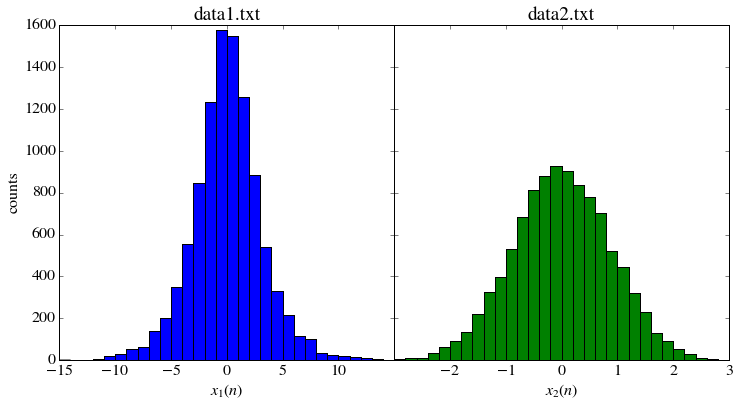

In [3]:
# plot figure
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 6), dpi = 300)
n1, bins1, patches1 = ax1.hist(data1, color="b", bins = 30, range = (-15, 15))
ax1.set_title("data1.txt")
ax2.set_title("data2.txt")
ax1.set_xlabel(u"$x_{1}(n)$")
ax2.set_xlabel(u"$x_{2}(n)$")
ax1.set_ylabel("counts")
n2, bins2, patches2 = ax2.hist(data2, color="g", bins = 30, range = (-3,3))
# hide labels in joint axis
f.subplots_adjust(wspace=0)
f.axes[0].get_xticklabels()[-1].set_visible(False)
f.axes[1].get_xticklabels()[0].set_visible(False)

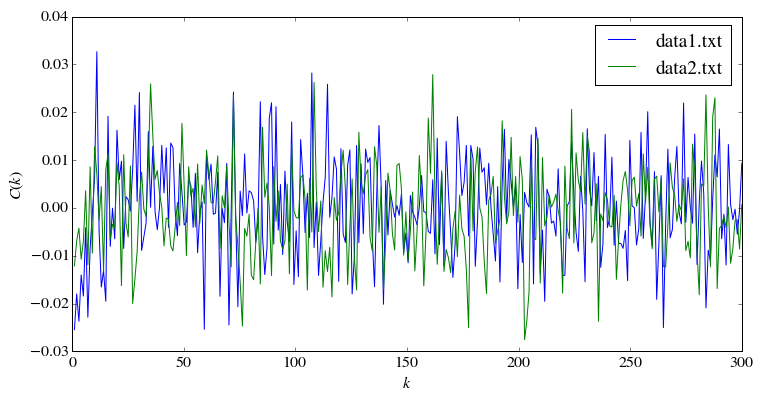

In [4]:

def autocorr(x):
    """
    Estimate normalized autocorrelation.
    """
    corr = np.correlate(x, x, mode='full')
    return corr[corr.size/2:]/corr.max()

# k ranges (from 0 to 10168)
k_min = 1
k_max = 300
# plot autocorrelation function for both series
f, (ax1) = plt.subplots(1, figsize = (12,6), dpi = 300)
ax1.set_xlabel(u"$k$")
ax1.set_ylabel(u"$C(k)$")
line1, = plt.plot(np.linspace(k_min,k_max,k_max-k_min), autocorr(data1)[k_min:k_max])
line2, = plt.plot(np.linspace(k_min,k_max,k_max-k_min), autocorr(data2)[k_min:k_max])
leg = f.legend((line1, line2), ('data1.txt', 'data2.txt'), loc=(0.77,0.785))

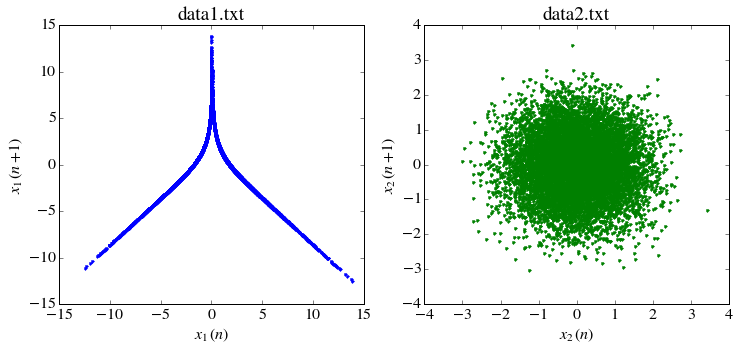

In [5]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), dpi = 300)
title1 = ax1.set_title("data1.txt")
line1, = ax1.plot(data1[0:-1], data1[1:], "b.")
xlabel1 = ax1.set_xlabel(u"$x_1(n)$")
ylabel1 = ax1.set_ylabel(u"$x_1(n+1)$")
title2 = ax2.set_title("data2.txt")
line2, = ax2.plot(data2[0:-1], data2[1:], "g.")
xlabel1 = ax2.set_xlabel(u"$x_2(n)$")
ylabel2 = ax2.set_ylabel(u"$x_2(n+1)$")

# Sensibilidad a las condiciones iniciales

In [6]:

def similar_init_region(x, n, epsilon, max_diff):
    """
    Find a point in the data with similar initial conditions to
    point (i.e. with tolerance epsilon) and a forward region until
    difference is bigger than max_diff.
    """
    # NOTE : now n index starting in 0
    x_diff = np.abs(x-x[n])
    x_m = np.where(x_diff < epsilon)[0]
    # array to keep i_max
    i_max = np.zeros_like(x_m, np.int)
    for i,m in enumerate(x_m):
        # not take intoa account same value
        if (n == m):
            continue
        # bound checking
        if (m + 1 >= len(x)):
            continue
        # check how many points within max_diff
        while (np.abs(x[m+i_max[i]+1]-x[n+i_max[i]+1]) < max_diff):
            i_max[i]=i_max[i]+1
            # bound checking
            if (m+i_max[i]+1 >= len(x)):
                break
    return x_m, i_max
            
# get similar initial condition region for data1.txt        
epsilon1 = 0.02
max_diff1 = 1.0
n_values1 = [60, 139, 315]
i_values1 = [ 0, 0, 0]
m_values1 = [ 0, 0, 0]
for j in range(3):
    x_m, i_max  = similar_init_region(data1, n_values1[j], 
                                      epsilon1, max_diff1)
    i_values1[j], m_values1[j] = i_max.max(), x_m[np.argmax(i_max)]
    
# get similar initial condition region for data2.txt        
epsilon2 = 0.005
max_diff2 = 0.4
n_values2 = [ 95, 334, 1701]
i_values2 = [ 0, 0, 0]
m_values2 = [ 0, 0, 0]
for j in range(3):
    x_m, i_max  = similar_init_region(data2, n_values2[j], 
                                      epsilon2, max_diff2)
    i_values2[j], m_values2[j] = i_max.max(), x_m[np.argmax(i_max)]    


Results of Lyapunov fits for data1.txt
 fit 0: slope = lambda = 0.69  b = -8.43
 fit 1: slope = lambda = 0.71  b = -9.44
 fit 2: slope = lambda = 0.70  b = -9.36
Results of Lyapunov fits for data2.txt
 fit 0: slope = lambda = 0.46  b = -5.32
 fit 1: slope = lambda = 0.16  b = -3.65
 fit 2: slope = lambda = 0.51  b = -4.34


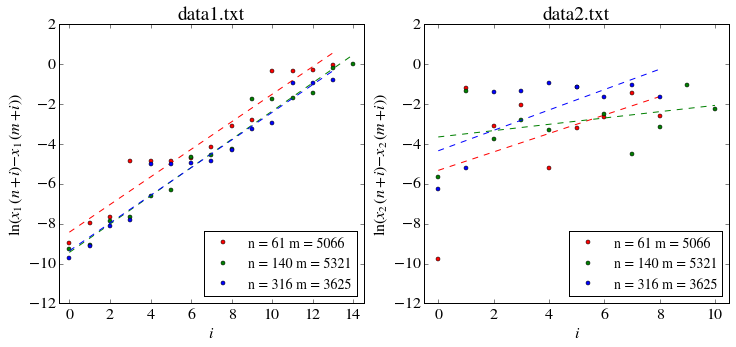

In [7]:
# create figures
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), dpi = 300)
# plot ln(abs(x(n+i)-x(m+1))) for 3 values of n in data1.txt
title1 = ax1.set_title("data1.txt")
points1 = []
lines1 = []
fits1 = []
colors1 = ["r","g","b"]
xlabel1 = ax1.set_xlabel(u"$i$")
ylabel1 = ax1.set_ylabel(u"$\ln(x_1(n+i)-x_1(m+i))$")
for j in range(3):
    x_n_arr = data1[n_values1[j]:n_values1[j]+i_values1[j]+1]
    x_m_arr = data1[m_values1[j]:m_values1[j]+i_values1[j]+1]
    x = np.linspace(0,i_values1[j],i_values1[j]+1)
    y = np.log(np.abs(x_n_arr-x_m_arr))
    points1.append(ax1.plot(x,y,"o"+colors1[j], markersize = 4)[0])
    # fit to linear regression
    fits1.append(np.polyfit(x, y, 1))
    lines1.append(ax1.plot(x,np.poly1d(fits1[j])(x),"--"+colors1[j])[0])
leg_text1 = ['n = {0} m = {1}'.format(n_values1[j]+1,m_values1[j]+1) for j in range(3)]
leg1 = ax1.legend(points1, leg_text1, loc = 4, numpoints = 1, fontsize = 14)
ax1.set_xlim((-0.5, 14.5))
ax1.set_ylim((-12, 2))
# print fit results
print "Results of Lyapunov fits for data1.txt"
for j in range(3):
    print ' fit {0:d}: slope = lambda = {1:2.2f}  b = {2:2.2f}'.format(j,fits1[j][0],fits1[j][1])

title2 = ax2.set_title("data2.txt")
points2 = []
lines2 = []
fits2 = []
colors2 = ["r","g","b"]
xlabel2 = ax2.set_xlabel(u"$i$")
ylabel2 = ax2.set_ylabel(u"$\ln(x_2(n+i)-x_2(m+i))$")
for j in range(3):
    x_n_arr = data2[n_values2[j]:n_values2[j]+i_values2[j]+1]
    x_m_arr = data2[m_values2[j]:m_values2[j]+i_values2[j]+1]
    x = np.linspace(0,i_values2[j],i_values2[j]+1)
    y = np.log(np.abs(x_n_arr-x_m_arr))
    points2.append(ax2.plot(x,y,"o"+colors1[j], markersize = 4)[0])
    # fit to linear regression
    fits2.append(np.polyfit(x, y, 1))
    lines2.append(ax2.plot(x,np.poly1d(fits2[j])(x),"--"+colors1[j])[0])
leg_text2 = ['n = {0} m = {1}'.format(n_values1[j]+1,m_values1[j]+1) for j in range(3)]
leg2 = ax2.legend(points2, leg_text2, loc = 4, numpoints = 1, fontsize = 14)
ax2.set_xlim((-0.5, 10.5))
ax2.set_ylim((-12, 2))
# print fit results
print "Results of Lyapunov fits for data2.txt"
for j in range(3):
    print ' fit {0:d}: slope = lambda = {1:2.2f}  b = {2:2.2f}'.format(j,fits2[j][0],fits2[j][1])
    

# Predicción

In [8]:

def find_near_region(x, n, rel_tol):
    """
    Find points in the data with with small differencess (less
    than rel_tol) with respect to x(n) point.
    """
    # NOTE : now n index starting in 0
    x_diff = np.abs(x-x[n])
    # get indexes within tol ( remove index n )
    m_j = np.where(x_diff[x_diff != 0]/np.abs(x[x != x[n]]) < rel_tol)[0]
    return m_j+1

def predict_evolution(x, n, m_j, i_array ):
    """
    Predict behaviour for x(n+i), where i are the values
    of the i_array elements. A list or np_array of indexes
    of points in the neighbourhood of x(n) is passed as m_j.
    """
    x_n_i = np.zeros(len(i_array))
    for i in range(len(i_array)):
        x_n_i[i] = np.mean(x[m_j+i_array[i]])
    return x_n_i
    

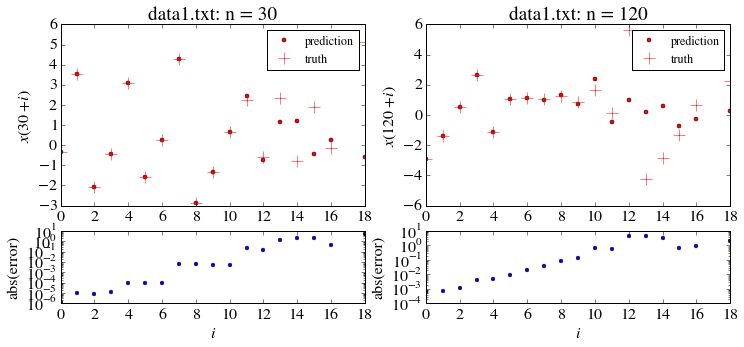

In [9]:
# create figure and subplot grid
f = plt.figure(figsize=(12,5), dpi = 300)
gs = gridspec.GridSpec(2, 2, height_ratios=[5,2])
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax4 = plt.subplot(gs[3])

# predict for fist point
n= 30
i_max = 18
rel_tol = 0.001
m_j = find_near_region(data1, n, rel_tol )
x = np.linspace(0,i_max, i_max , dtype=np.int)
prediction = predict_evolution(data1,n, m_j, x)
truth = data1[n:n+i_max]
ax1.set_title("data1.txt: n = {0}".format(n))
p_pred = ax1.plot(x, prediction,"ro", markersize=4)[0]
p_truth = ax1.plot(x, truth ,"r+", markersize=12)[0]
ax1_ylabel = ax1.set_ylabel(u"$x({0}+i)$".format(n))
ax1.legend((p_pred, p_truth), ("prediction", "truth"), numpoints = 1, fontsize = 12)
p_error = ax3.plot(x, np.abs(prediction-truth), "bh", markersize=4)
ax3_xlabel = ax3.set_xlabel(u"$i$")
ax3.set_yscale("log")
ax3_ylabel = ax3.set_ylabel(u"abs(error)")

# predict for second point
n= 120
i_max = 18
rel_tol = 0.001
m_j = find_near_region(data1, n, rel_tol)
x = np.linspace(0,i_max, i_max , dtype=np.int)
prediction = predict_evolution(data1,n, m_j, x)
truth = data1[n:n+i_max]
ax2.set_title("data1.txt: n = {0}".format(n))
p_pred = ax2.plot(x, prediction,"ro", markersize=4)[0]
p_truth = ax2.plot(x, truth ,"r+", markersize=12)[0]
ax2_ylabel = ax2.set_ylabel(u"$x({0}+i)$".format(n))
ax2.legend((p_pred, p_truth), ("prediction", "truth"), numpoints = 1, fontsize = 12)
p_error = ax4.plot(x, np.abs(prediction-truth), "bh", markersize=4)
ax4_xlabel = ax4.set_xlabel(u"$i$")
ax4.set_yscale("log")
ax4_ylabel = ax4.set_ylabel(u"abs(error)")

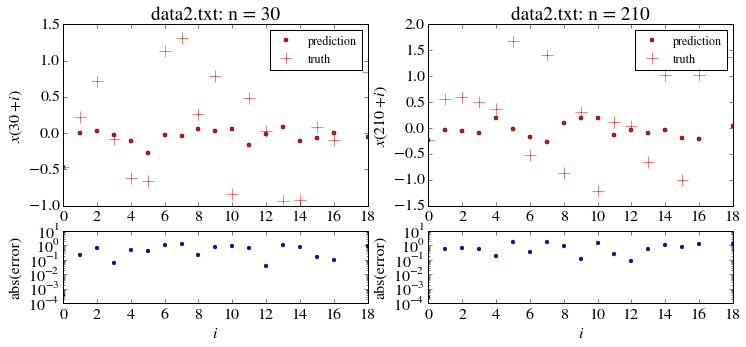

In [10]:
# create figure and subplot grid
f = plt.figure(figsize=(12,5), dpi = 300)
gs = gridspec.GridSpec(2, 2, height_ratios=[5,2])
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax4 = plt.subplot(gs[3])

# predict for fist point
n= 30
i_max = 18
rel_tol = 0.01
m_j = find_near_region(data2, n, rel_tol )
x = np.linspace(0,i_max, i_max , dtype=np.int)
prediction = predict_evolution(data2,n, m_j, x)
truth = data2[n:n+i_max]
ax1.set_title("data2.txt: n = {0}".format(n))
p_pred = ax1.plot(x, prediction,"ro", markersize=4)[0]
p_truth = ax1.plot(x, truth ,"r+", markersize=12)[0]
ax1_ylabel = ax1.set_ylabel(u"$x({0}+i)$".format(n))
ax1.legend((p_pred, p_truth), ("prediction", "truth"), numpoints = 1, fontsize = 12)
p_error = ax3.plot(x, np.abs(prediction-truth), "bh", markersize=4)
ax3_xlabel = ax3.set_xlabel(u"$i$")
ax3.set_yscale("log")
ax3_ylabel = ax3.set_ylabel(u"abs(error)")

# predict for second point
n= 210
i_max = 18
rel_tol = 0.01
m_j = find_near_region(data2, n, rel_tol)
x = np.linspace(0,i_max, i_max , dtype=np.int)
prediction = predict_evolution(data2,n, m_j, x)
truth = data2[n:n+i_max]
ax2.set_title("data2.txt: n = {0}".format(n))
p_pred = ax2.plot(x, prediction,"ro", markersize=4)[0]
p_truth = ax2.plot(x, truth ,"r+", markersize=12)[0]
ax2_ylabel = ax2.set_ylabel(u"$x({0}+i)$".format(n))
ax2.legend((p_pred, p_truth), ("prediction", "truth"), numpoints = 1, fontsize = 12)
p_error = ax4.plot(x, np.abs(prediction-truth), "bh", markersize=4)
ax4_xlabel = ax4.set_xlabel(u"$i$")
ax4.set_yscale("log")
ax4_ylabel = ax4.set_ylabel(u"abs(error)")